In [11]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, checkvalue, closestemotion , averagecolorembedding

import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.stats import kendalltau
from sklearn.metrics import pairwise_distances

In [2]:
## load emotion and color data from experiment one
d = DataLoader(context=1, location='../data/behavioral/processeddata/1/')
d.load_color()
d.load_emotion()
d.load_emotion_color_association()

In [3]:
## reduce the similarity matrix to 2 dimensions
color_embedding = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding = reduce_dimensions(d.average_emotion_matrix, 2)

In [4]:
colors_unique, mapping = closestemotion(emotion_embedding, color_embedding,d.color, d.emotion)

In [6]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

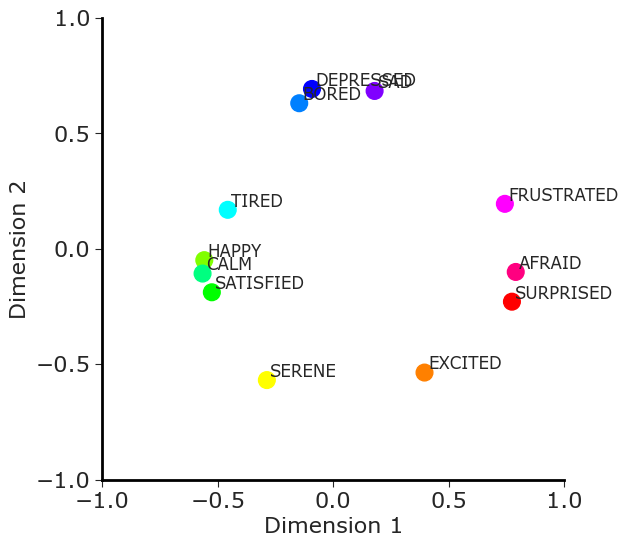

In [9]:
## Figure 2E.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(colors_unique[:, 0], colors_unique[:, 1], c=d.color_values)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')
plt.locator_params(nbins=4)

for i in range(0, len(d.color)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (colors_unique[i, 0], colors_unique[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=12)
plt.savefig('../figures/2supp.svg', dpi=600,bbox_inches='tight')

In [16]:
## define permutation test

iterations = 5000
turns = 0
rvalues = []
origr, origp = kendalltau(
        pairwise_distances(colors_unique), pairwise_distances(color_embedding)
    )
for i in tqdm(range(0, iterations)):
    avr = averagecolorembedding(color_embedding, d.number_of_emotions, d.number_of_colors)
    reaaranged = closestemotion(avr, color_embedding,d.color, d.emotion)[0]
    [boolean, r] = checkvalue(reaaranged, color_embedding, origr)
    turns = turns + boolean
    rvalues.append(r)
print(turns / iterations)


100%|██████████| 5000/5000 [00:07<00:00, 667.65it/s]

0.0
